<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [23]:
plt.rcParams['xtick.minor.size'] = 0
plt.rcParams['xtick.minor.width'] = 0

In [2]:
np.random.normal(loc = 5, scale = 2, size = 10)

array([9.02322853, 5.24773259, 7.81530741, 3.05408974, 3.88269239,
       5.12723875, 7.20966914, 1.8208376 , 6.63831657, 5.94684234])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

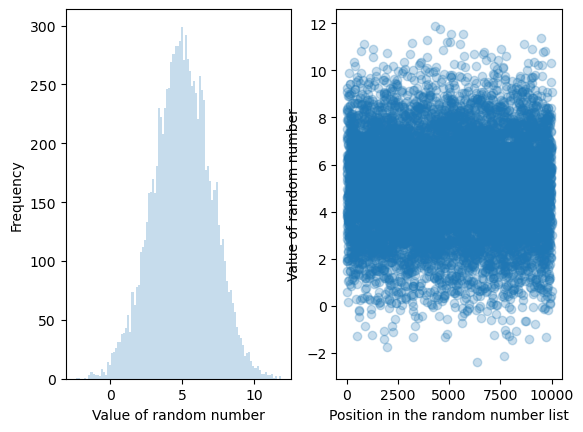

In [3]:
n = 10000
random_numbers = np.random.normal(loc = 5, scale = 2, size = n)

fig, ax = plt.subplots(nrows = 1, ncols = 2)

axis = ax[0]
axis.hist(random_numbers, bins = 100, alpha = 0.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha = 0.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [4]:
n = 10000
mean, sd = 5, 2
random_numbers = np.random.normal(loc = mean, scale = sd, size = n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 68.49%


## 1 Brownian Motion in 1D

### 1.1 The scenario

### 1.2 The simulation

In [5]:
import numpy.random as rnd

In [6]:
def brown_1d(prob_right = 0.5, no_of_steps = 10000):
    '''
        This function returns the final position of the particle
        after the number of steps. 
        prob_right is the probability of going right. 
    '''
    
    step_size = 1
    x = 0 
    
    for _ in range(no_of_steps): 
        if rnd.random() < prob_right:
            x += step_size
            
        else: 
            x -= step_size 
            
    return x      

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p = 0.5')

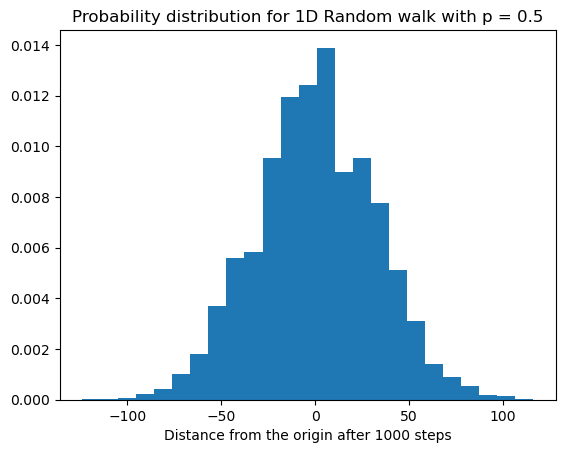

In [7]:
no_of_steps, p = 1000, 0.5
repeats = 10000
results = [brown_1d(prob_right = p, no_of_steps = no_of_steps)
          for _ in range(repeats)]

plt.hist(results, bins = 25, density = True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p = {p}')

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p = 0.6')

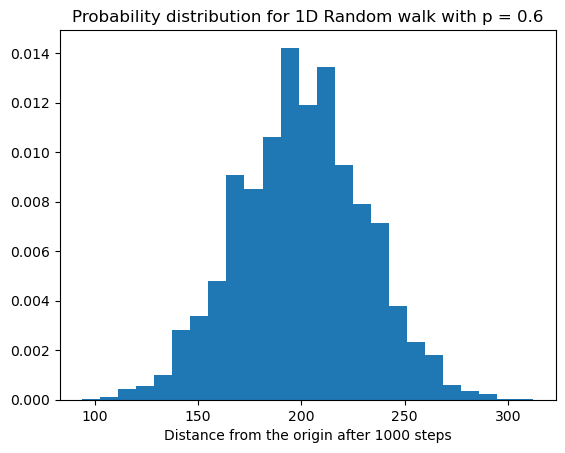

In [8]:
no_of_steps, p = 1000, 0.6
repeats = 10000
results = [brown_1d(prob_right = p, no_of_steps = no_of_steps)
          for _ in range(repeats)]

plt.hist(results, bins = 25, density = True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p = {p}')

### 1.3 What does theory say?

In [26]:
def normal(x, m = 0, s = 1):
    '''
    Probability density function for the 
    Gaussian distribution
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

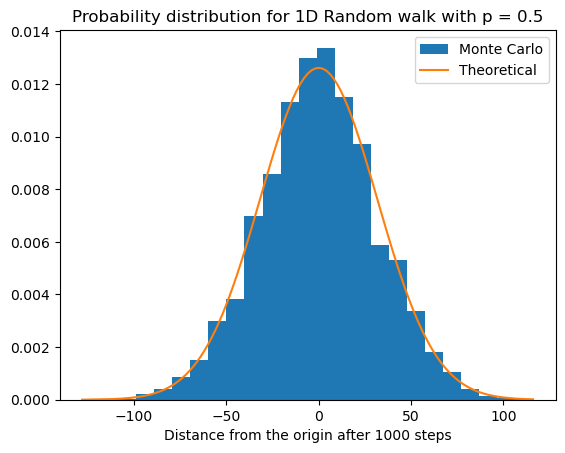

In [29]:
prob_left = 1 - prob_right
mean = no_of_steps * (prob_right - prob_left)
sd = np.sqrt(4*no_of_steps * prob_right * prob_left)
x = np.unique(results)

no_of_steps, p = 1000, 0.5
repeats = 10000
results = [brown_1d(prob_right = p, no_of_steps = no_of_steps)
          for _ in range(repeats)]

plt.hist(results, bins = 25, density = True, label = 'Monte Carlo')
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p = {p}')


plt.plot(x, normal(x, mean, sd), label = 'Theoretical')
plt.legend()


## 2 Estimating \(\pi\)

### 2.1 The method

### 2.2 A poor but intuitive solution

In [ ]:
N_total = 100000
N_green = 0


for _ in range(N_total): 
    x = rnd.uniform(low = -1, high = 1, size = 1)
    y = rnd.uniform(low = -1, high = 1, size = 1)
    r = np.sqrt(x**2 + y**2)
    
    if r <= 1:
        N_green += 1
        

4 * N_green / N_total

### 2.3 A better solution

In [ ]:
N_total = 1000000
x = rnd.uniform(low = -1, high = 1, size = N_total)
y = rnd.uniform(low = -1, high = 1, size = N_total)
N_green = np.sum((x**2 + y**2) <= 1)

4 * (N_green / N_total)

### 2.4 A smarter solution

In [ ]:
N_total = 1000000
x = rnd.rand(N_total)
y = rnd.rand(N_total)
N_green = np.sum((x**2 + y**2) <= 1)

4 * (N_green / N_total)

## Exercise 1 :  Vital Stats of Random π

In [11]:
def estimate_pi(n):
    N_total = n
    x = rnd.rand(N_total)
    y = rnd.rand(N_total)
    N_green = np.sum((x**2 + y**2) <= 1)
    return 4 * (N_green / N_total)


In [12]:
no_of_repeats = 100
pi_estimate_result = [estimate_pi(10000) for _ in range(no_of_repeats)]

In [13]:
np.mean(pi_estimate_result)

3.143516

In [14]:
np.std(pi_estimate_result)

0.015688395201549462

In [15]:
numbers = [10, 100, 1000, 10000, 100000, 1000000]

In [16]:
test_list = [1, 2, 3]
test_list += [[4, 5]]
test_list

[1, 2, 3, [4, 5]]

In [17]:
pi_estimate_results = []


for number in numbers: 
    pi_estimate_results = pi_estimate_results + [estimate_pi(number) for _ in range(100)]

In [18]:
# pi_estimate_results += [estim....]

In [19]:
k = 100
pi_estimate_results_split = []
pi_estimate_results_split = pi_estimate_results_split + [pi_estimate_results[i:i+k] for i in range(0, len(pi_estimate_results), k)]

In [20]:
pi_estimate_results_split_array = np.array(pi_estimate_results_split)

In [21]:
mean = []
std = []
for i in pi_estimate_results_split_array:
    mean = mean + [np.mean(i)]
    std = std + [np.std(i)]

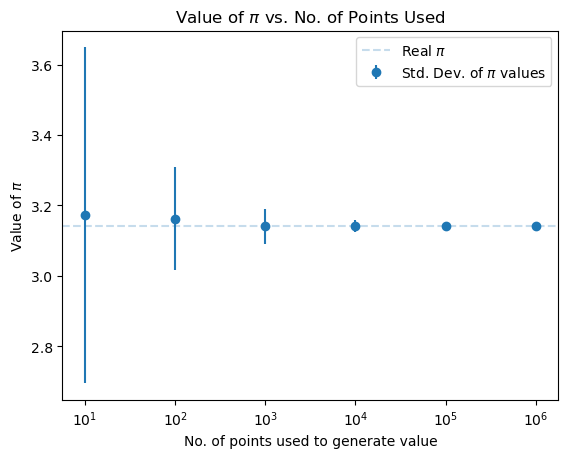

In [24]:
plt.xscale('log')
plt.errorbar(numbers, mean, yerr=std,fmt='o')
plt.ylabel('Value of $\pi$')
plt.xlabel('No. of points used to generate value')
plt.title('Value of $\pi$ vs. No. of Points Used')
plt.axhline(y=np.pi, ls='dashed', alpha = 0.25)
plt.legend(["Real $\pi$","Std. Dev. of $\pi$ values"])
